In [66]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/raw/uk-war.csv", names=["date","time","location","lat","lon","kind","description","link"])
df.dropna(axis=0,how='any',subset=['lat','lon'],inplace=True)
# Variable with the Longitude and Latitude
X=df.loc[:,['kind','lat','lon']]
X = X[X["kind"].str.contains("Ua") == False]
X = X.drop('kind', axis=1)
X.info()
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 1 to 162
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     102 non-null    float64
 1   lon     102 non-null    float64
dtypes: float64(2)
memory usage: 2.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 1 to 162
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     102 non-null    float64
 1   lon     102 non-null    float64
dtypes: float64(2)
memory usage: 2.4 KB
None


In [67]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

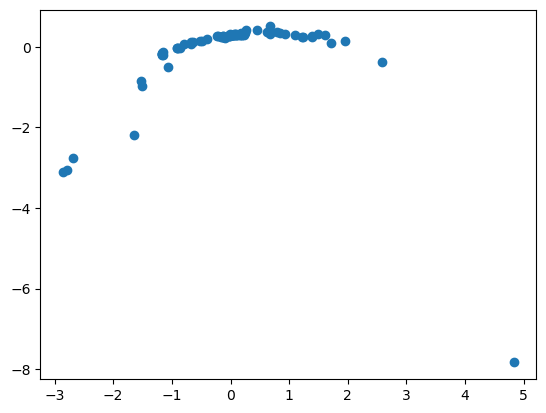

In [68]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [71]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

n_of_sample = [3, 4, 5, 6]
eps_list = [0.15, 0.20, 0.25, 0.30]
labels_for_n_of_sample = []

for i in n_of_sample:
    for j in eps_list:
        db = DBSCAN(eps=j, min_samples=i,algorithm='ball_tree').fit(X)
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        print("Estimated number of clusters: %d" % n_clusters_)
        print("Estimated number of noise points: %d" % n_noise_)

        labels_for_n_of_sample.append([labels,n_clusters_,n_noise_,i,j])

Estimated number of clusters: 6
Estimated number of noise points: 12
Estimated number of clusters: 2
Estimated number of noise points: 11
Estimated number of clusters: 2
Estimated number of noise points: 9
Estimated number of clusters: 1
Estimated number of noise points: 9
Estimated number of clusters: 5
Estimated number of noise points: 16
Estimated number of clusters: 3
Estimated number of noise points: 11
Estimated number of clusters: 2
Estimated number of noise points: 10
Estimated number of clusters: 1
Estimated number of noise points: 10
Estimated number of clusters: 3
Estimated number of noise points: 26
Estimated number of clusters: 5
Estimated number of noise points: 12
Estimated number of clusters: 3
Estimated number of noise points: 10
Estimated number of clusters: 1
Estimated number of noise points: 10
Estimated number of clusters: 3
Estimated number of noise points: 30
Estimated number of clusters: 4
Estimated number of noise points: 18
Estimated number of clusters: 4
Esti

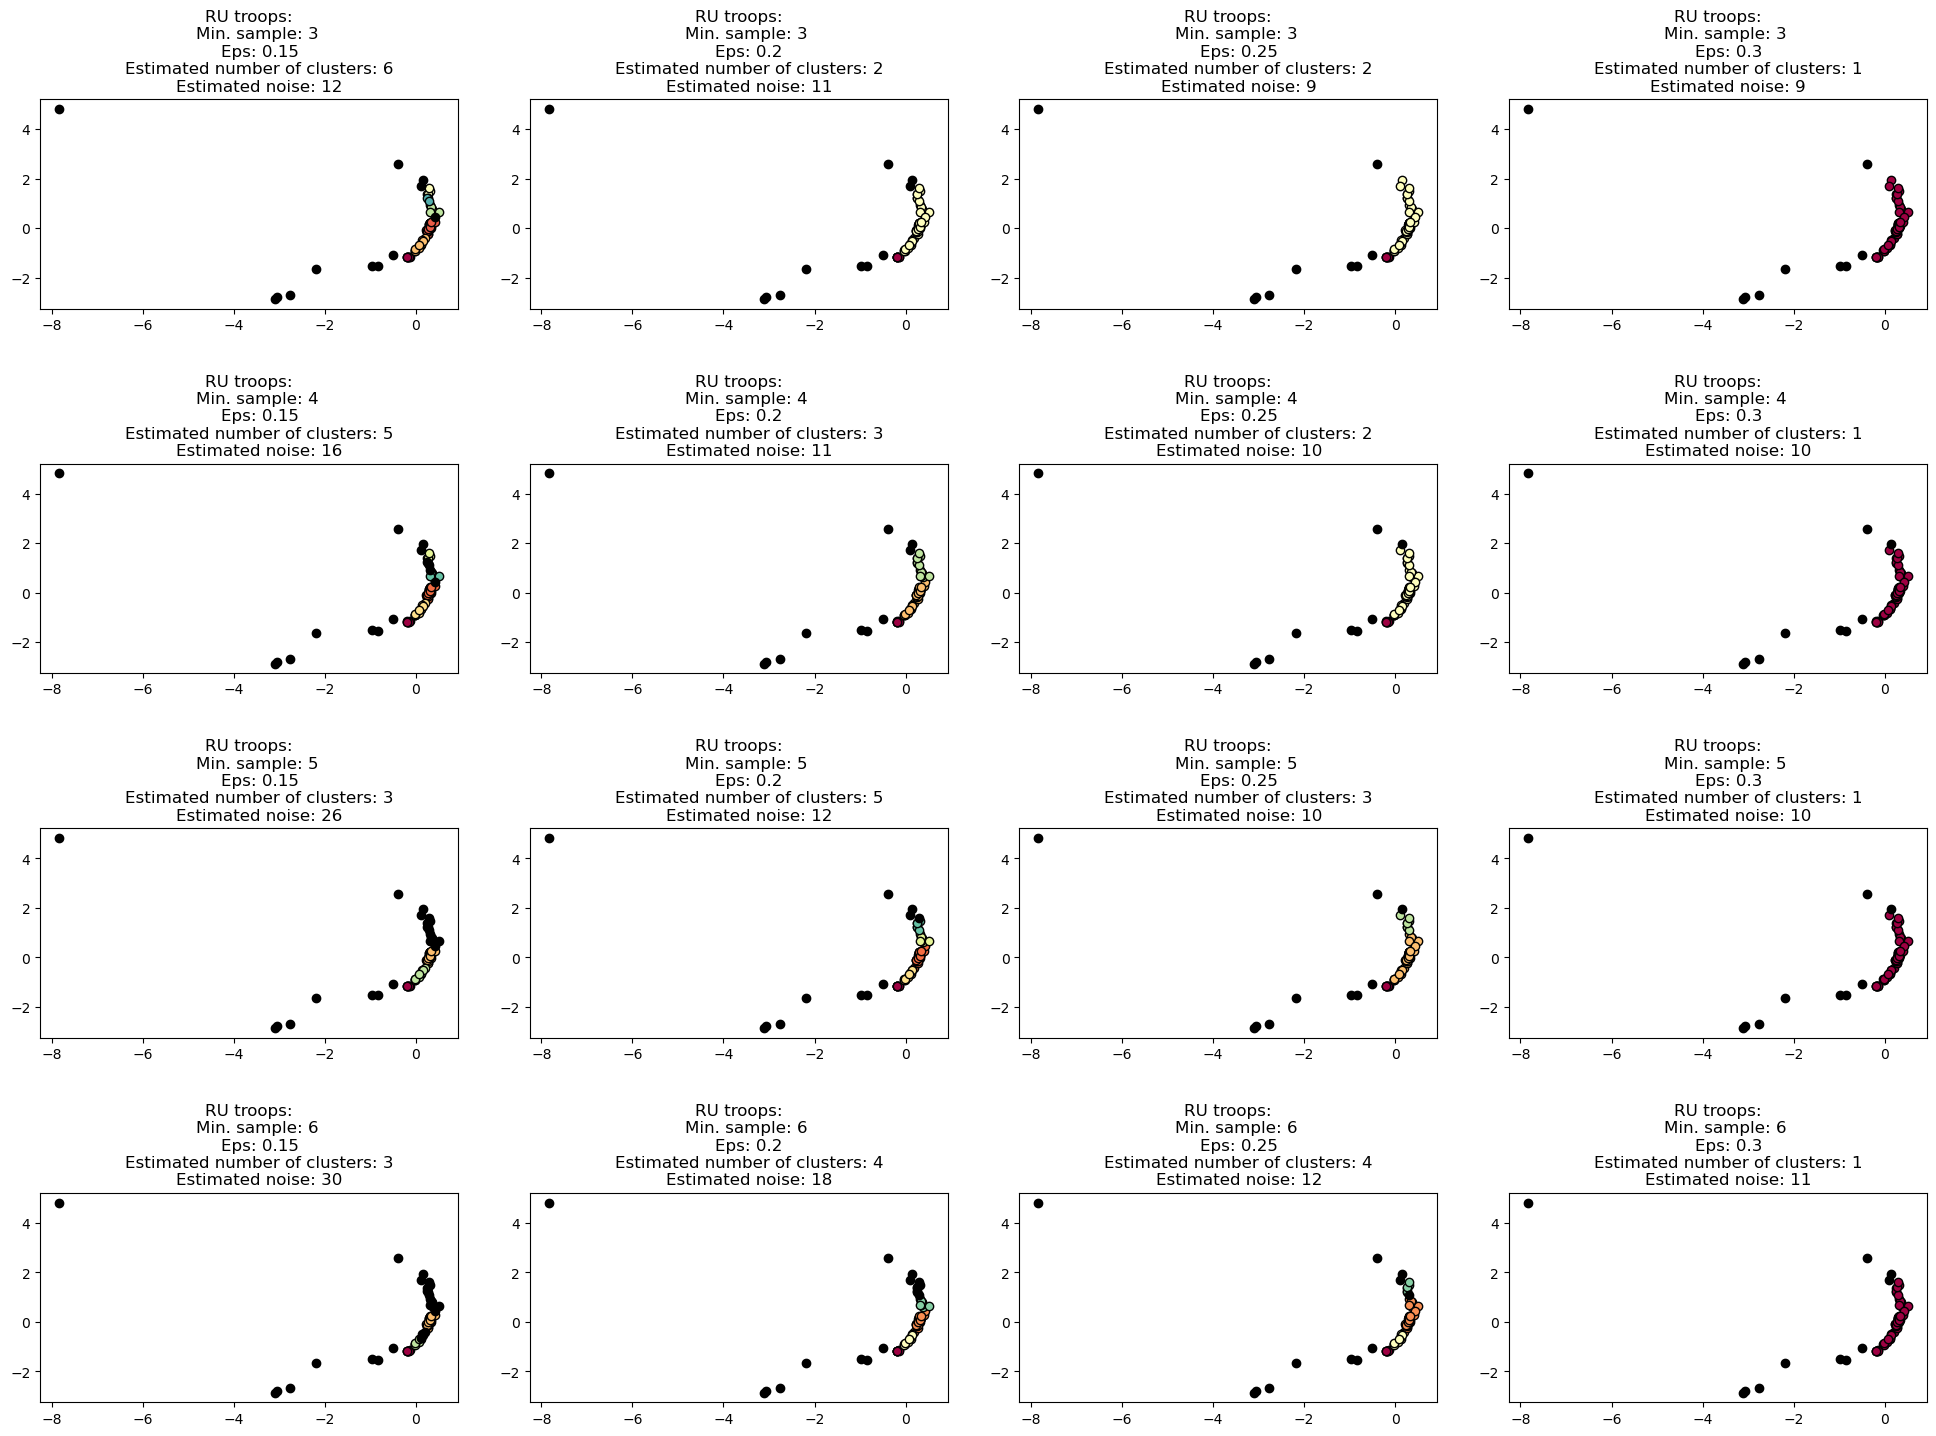

In [72]:

f = plt.figure(figsize=(20,15))
i=1
for labels,n_clusters_,n_noise_,min_sample, eps in labels_for_n_of_sample:
    # Create a subplot with 1 row and 2 columns
    # Create a subplot with 1 row and 2 columns
    f.add_subplot(4,4,i)

    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 1],
            xy[:, 0],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 1],
            xy[:, 0],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title(f'''RU troops:
    Min. sample: {min_sample} 
    Eps: {eps}
    Estimated number of clusters: {n_clusters_}
    Estimated noise: {n_noise_}''')
    plt.tight_layout(pad=3.0)
    i+=1